In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
x_train = pd.read_csv("train_fNxu4vz.csv")
x_test = pd.read_csv("test_fjtUOL8.csv")

In [288]:
x_train.shape,x_test.shape

((164309, 14), (109541, 13))

In [289]:
x_train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3


In [290]:
y_train = x_train["Interest_Rate"]
x_train.drop(columns = ["Interest_Rate"],inplace=True)

In [291]:
x_train.drop(columns=["Loan_ID"],inplace=True)
x_test.drop(columns=["Loan_ID"],inplace=True)

In [292]:
x_train

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female
1,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female
2,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male
3,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male
4,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
164304,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male
164305,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male
164306,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male
164307,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female


In [293]:
x_train.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [294]:
x_test.isnull().sum()

Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [295]:
col = np.array(x_train["Home_Owner"])

In [296]:
col.shape

(164309,)

# Checking For Uniqueness

In [297]:
x_train["Home_Owner"].unique()

array(['Rent', 'Mortgage', nan, 'Own', 'Other', 'None'], dtype=object)

In [298]:
x_train["Length_Employed"].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [299]:
x_train["Home_Owner"].value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

# Filling NAN Values

In [300]:
x_train["Length_Employed"].fillna("10+ years",inplace=True)
x_test["Length_Employed"].fillna("10+ years",inplace=True)

In [301]:
x_train["Home_Owner"].fillna("NAN",inplace=True)
x_test["Home_Owner"].fillna("NAN",inplace=True)

# Filling NAN Values Using Function

In [302]:
group_train = x_train.groupby("Length_Employed")
group_test = x_test.groupby("Length_Employed")

In [303]:
def func(x):
    print("Mean of this Length_Emplyed", x.mean())
    return x.fillna(x.mean())

In [304]:
x_train["Annual_Income"] = group_train["Annual_Income"].apply(func)
x_test["Annual_Income"] = group_test["Annual_Income"].apply(func)

Mean of this Length_Emplyed 69486.85781402198
Mean of this Length_Emplyed 76717.30485088802
Mean of this Length_Emplyed 70832.59065371595
Mean of this Length_Emplyed 72395.39474922487
Mean of this Length_Emplyed 71150.55752044253
Mean of this Length_Emplyed 71704.91774737302
Mean of this Length_Emplyed 72043.15529464862
Mean of this Length_Emplyed 72690.15270495952
Mean of this Length_Emplyed 74645.17463132602
Mean of this Length_Emplyed 73860.3171714124
Mean of this Length_Emplyed 67694.48663199558
Mean of this Length_Emplyed 68749.23073845096
Mean of this Length_Emplyed 76182.2082814654
Mean of this Length_Emplyed 71765.34031113802
Mean of this Length_Emplyed 71291.29817815454
Mean of this Length_Emplyed 71135.61014585556
Mean of this Length_Emplyed 73856.09360195759
Mean of this Length_Emplyed 72447.41645392748
Mean of this Length_Emplyed 74211.70622107478
Mean of this Length_Emplyed 74656.08695019332
Mean of this Length_Emplyed 76057.10163179917
Mean of this Length_Emplyed 68337.64

# Dropping Columns with more NAN Values

In [305]:
# x_train["Months_Since_Deliquency"].fillna(x_train["Months_Since_Deliquency"].mean(),inplace=True)
# x_test["Months_Since_Deliquency"].fillna(x_test["Months_Since_Deliquency"].mean(),inplace=True)

In [306]:
x_train.drop(columns=["Months_Since_Deliquency"],inplace=True)
x_test.drop(columns=["Months_Since_Deliquency"],inplace=True)

<AxesSubplot:>

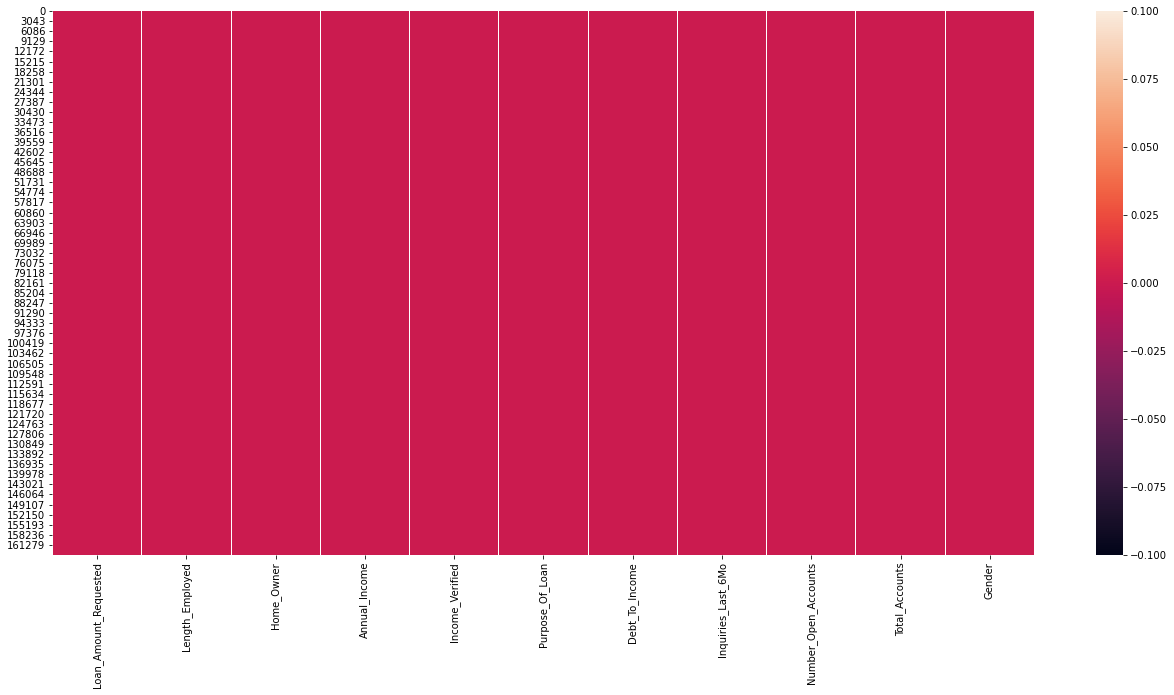

In [307]:
plt.figure(figsize=(22,10))
sns.heatmap(x_train.isnull())

<AxesSubplot:>

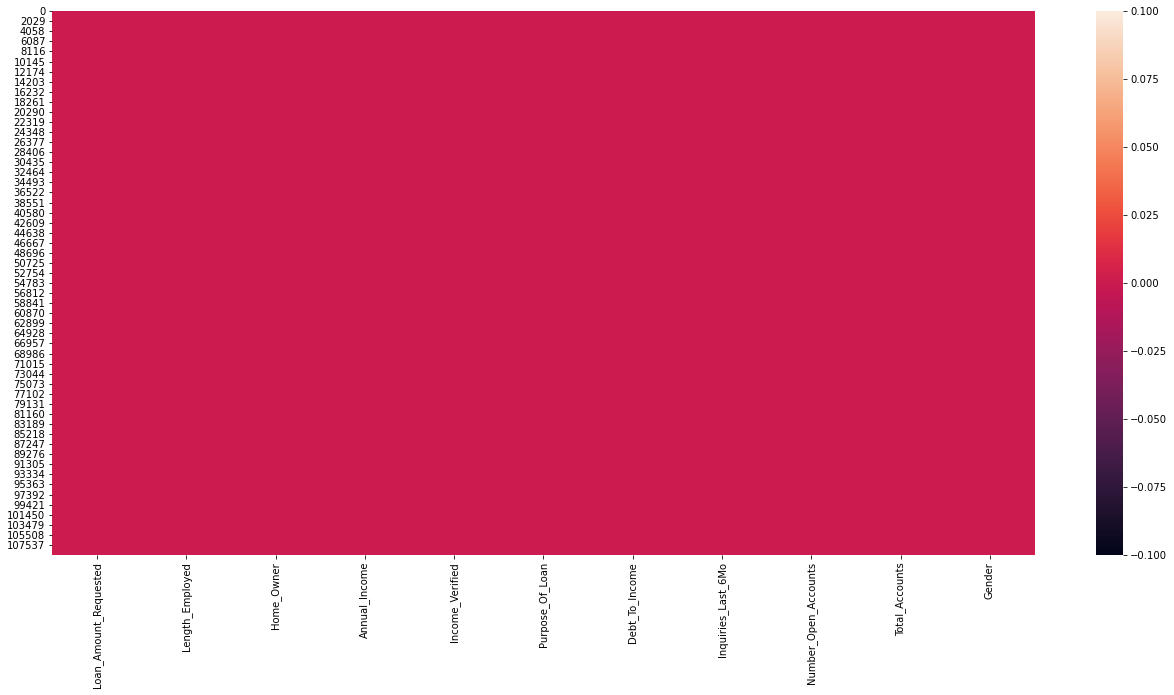

In [308]:
plt.figure(figsize=(22,10))
sns.heatmap(x_test.isnull())

In [309]:
x_train.shape,x_test.shape

((164309, 11), (109541, 11))

In [310]:
train = x_train
test = x_test

# Catboost With Caategorical Variables

In [311]:
from catboost import CatBoostClassifier

In [312]:
x_train

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,"7,000",< 1 year,Rent,68000.000000,not verified,car,18.37,0,9,14,Female
1,"30,000",4 years,Mortgage,71150.557520,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female
2,"24,725",7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male
3,"16,000",< 1 year,NAN,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male
4,"17,000",8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female
...,...,...,...,...,...,...,...,...,...,...,...
164304,"20,725",10+ years,Rent,76717.304851,VERIFIED - income source,credit_card,13.56,0,13,16,Male
164305,"6,000",8 years,Own,74645.174631,VERIFIED - income source,small_business,9.12,0,13,30,Male
164306,"20,250",10+ years,Mortgage,76717.304851,VERIFIED - income,credit_card,18.17,1,17,30,Male
164307,"10,000",4 years,Rent,71150.557520,not verified,major_purchase,18.75,1,16,62,Female


In [191]:
cb = CatBoostClassifier(depth=10,iterations=400,learning_rate=0.3,l2_leaf_reg= 14)

In [192]:
cat_features_index = [0,1,2,4,5,11]

In [194]:
# cb.fit(x_train,y_train,cat_features=cat_features_index)

In [151]:
cb.score(x_train,y_train)

0.6054567917764699

In [152]:
y_pred = cb.predict(x_test)

In [153]:
y_pred.shape

(109541, 1)

In [154]:
id = pd.read_csv("sample_submission_HSqiq1Q.csv")

In [155]:
id.drop(columns=["Interest_Rate"],inplace=True)

In [156]:
id.shape

(109541, 1)

In [157]:
y_prediction = np.hstack((id,y_pred))

In [158]:

y_prediction.shape

(109541, 2)

In [159]:
df = pd.DataFrame(data = y_prediction,columns=["Loan_ID","Interest_Rate"])
df.to_csv("Loan_Price_Prediction_Catboost_Categoriacl.csv",index=False)

# Random Forrest

In [215]:
x_train["Loan_Amount_Requested"].value_counts()

10,000    11622
12,000     9018
15,000     8459
20,000     7993
35,000     5844
          ...  
26,425        1
33,650        1
22,775        1
33,200        1
33,725        1
Name: Loan_Amount_Requested, Length: 1290, dtype: int64

In [313]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [314]:
combine = x_train.append(x_test)

In [315]:
combine

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,"7,000",< 1 year,Rent,68000.00000,not verified,car,18.37,0,9,14,Female
1,"30,000",4 years,Mortgage,71150.55752,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female
2,"24,725",7 years,Mortgage,75566.40000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male
3,"16,000",< 1 year,NAN,56160.00000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male
4,"17,000",8 years,Own,96000.00000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female
...,...,...,...,...,...,...,...,...,...,...,...
109536,"15,000",9 years,Mortgage,120000.00000,VERIFIED - income,other,8.15,2,13,57,Male
109537,"9,600",10+ years,Mortgage,125000.00000,not verified,credit_card,9.08,1,9,34,Male
109538,"2,000",5 years,Rent,37850.00000,not verified,credit_card,11.60,0,10,11,Male
109539,"2,125",6 years,Rent,30000.00000,not verified,other,24.88,0,5,6,Male


# Label Encoding

In [319]:
le = LabelEncoder()

In [317]:
combine["Gender"]=le.fit_transform(combine["Gender"])

In [318]:
combine["Income_Verified"] = le.fit_transform(combine["Income_Verified"])

In [320]:
combine["Loan_Amount_Requested"] = le.fit_transform(combine["Loan_Amount_Requested"])

In [321]:
combine["Length_Employed"] = le.fit_transform(combine["Length_Employed"])

In [322]:
combine["Purpose_Of_Loan"] = le.fit_transform(combine["Purpose_Of_Loan"])

In [323]:
combine["Length_Employed"] = le.fit_transform(combine["Length_Employed"])

In [327]:
combine["Home_Owner"] = le.fit_transform(combine["Home_Owner"])

In [324]:
combine.shape

(273850, 11)

In [325]:
combine["Loan_Amount_Requested"].value_counts()

39      19442
119     15020
239     13848
479     13399
1073     9811
        ...  
1030        1
935         1
963         1
808         1
958         1
Name: Loan_Amount_Requested, Length: 1320, dtype: int64

In [328]:
combine

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,1195,10,5,68000.00000,2,0,18.37,0,9,14,0
1,911,4,0,71150.55752,0,2,14.93,0,12,24,0
2,668,7,0,75566.40000,1,2,15.88,0,12,16,1
3,279,10,1,56160.00000,1,2,14.34,3,16,22,1
4,319,8,4,96000.00000,1,2,22.17,1,19,30,0
...,...,...,...,...,...,...,...,...,...,...,...
109536,239,9,0,120000.00000,0,9,8.15,2,13,57,1
109537,1302,1,0,125000.00000,2,1,9.08,1,9,34,1
109538,439,5,5,37850.00000,2,1,11.60,0,10,11,1
109539,444,6,5,30000.00000,2,9,24.88,0,5,6,1


In [329]:
combine["Income_Verified"].value_counts()

0    99076
1    88253
2    86521
Name: Income_Verified, dtype: int64

Text(0, 0.5, 'Frequency')

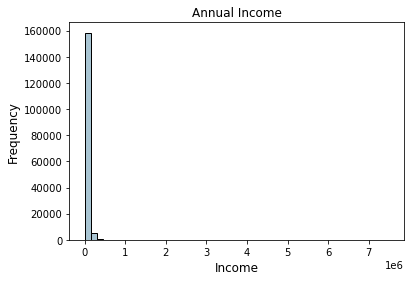

In [330]:
fig, ax = plt.subplots()
x_train["Annual_Income"].hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Annual Income', fontsize=12)
ax.set_xlabel('Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

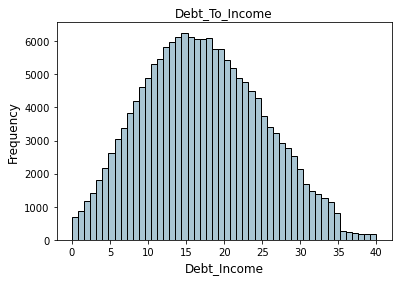

In [331]:
fig, ax = plt.subplots()
x_train["Debt_To_Income"].hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Debt_To_Income', fontsize=12)
ax.set_xlabel('Debt_Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

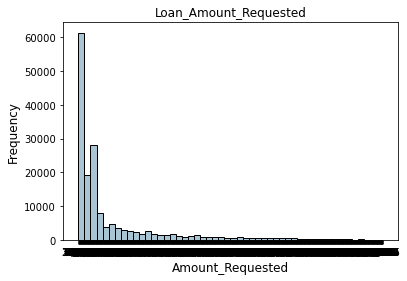

In [332]:
fig, ax = plt.subplots()
x_train["Loan_Amount_Requested"].hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Loan_Amount_Requested', fontsize=12)
ax.set_xlabel('Amount_Requested', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

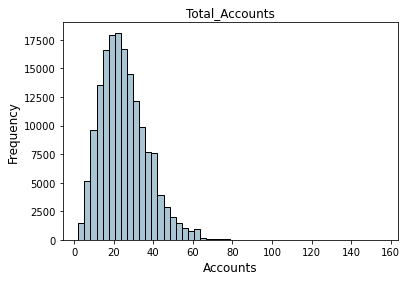

In [333]:
fig, ax = plt.subplots()
x_train["Total_Accounts"].hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('Total_Accounts', fontsize=12)
ax.set_xlabel('Accounts', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

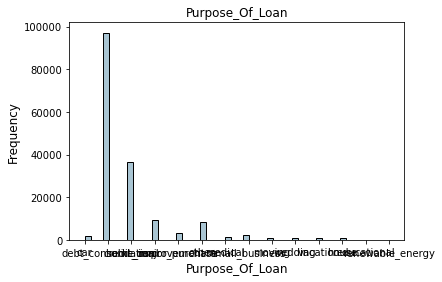

In [334]:
fig, ax = plt.subplots()
x_train["Purpose_Of_Loan"].hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title("Purpose_Of_Loan", fontsize=12)
ax.set_xlabel("Purpose_Of_Loan", fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [335]:
x_train = combine[:x_train.shape[0]]
x_test = combine[x_train.shape[0]:]

In [336]:
x_train.shape,x_test.shape

((164309, 11), (109541, 11))

In [233]:
# !pip install category_encoders

# Target Encoding

In [337]:
import category_encoders as ce

In [235]:
encoder = ce.TargetEncoder()

In [236]:
x_train["Loan_Amount_Requested"] = encoder.fit_transform(x_train["Loan_Amount_Requested"],y_train)
x_test["Loan_Amount_Requested"] = encoder.transform(x_test["Loan_Amount_Requested"])

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
encoder = ce.TargetEncoder()

In [239]:
x_train["Length_Employed"] = encoder.fit_transform(x_train["Length_Employed"],y_train)
x_test["Length_Employed"] = encoder.transform(x_test["Length_Employed"])

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [241]:
x_train["Length_Employed"].value_counts()

2.178731    60286
2.136115    14620
2.128642    12974
2.114174    12805
2.163862    10814
2.123969    10422
2.141660     9784
2.191556     9308
2.172421     9094
2.158520     7917
2.185362     6285
Name: Length_Employed, dtype: int64

In [242]:
x_train

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,1.908295,2.114174,Rent,68000.000000,2,car,18.37,0,9,14,0
1,2.440014,2.141660,Mortgage,71150.557520,0,debt_consolidation,14.93,0,12,24,0
2,2.600000,2.191556,Mortgage,75566.400000,1,debt_consolidation,15.88,0,12,16,1
3,2.105119,2.114174,NAN,56160.000000,1,debt_consolidation,14.34,3,16,22,1
4,1.988106,2.158520,Own,96000.000000,1,debt_consolidation,22.17,1,19,30,0
...,...,...,...,...,...,...,...,...,...,...,...
164304,2.684211,2.178731,Rent,76717.304851,1,credit_card,13.56,0,13,16,1
164305,1.948434,2.158520,Own,74645.174631,1,small_business,9.12,0,13,30,1
164306,2.450000,2.178731,Mortgage,76717.304851,0,credit_card,18.17,1,17,30,1
164307,2.019618,2.141660,Rent,71150.557520,2,major_purchase,18.75,1,16,62,0


In [243]:
# encoder= ce.BaseNEncoder(cols=["Length_Employed"],return_df=True,base=10)
# data_encoded_train = encoder.fit_transform(x_train["Length_Employed"])
# data_encoded_test = encoder.transform(x_test["Length_Employed"])
# data_encoded_train
# x_train = pd.concat([x_train,data_encoded_train])
# x_train.drop(columns=["Length_Employed"],inplace=True)
# x_test = pd.concat([x_teast,data_encoded_test])
# x_test.drop(columns=["Length_Employed"],inplace=True)

# Get Dummies

In [244]:
# x_train = pd.concat([x_train,pd.get_dummies(x_train["Length_Employed"])],axis=1)
# x_test = pd.concat([x_test,pd.get_dummies(x_test["Length_Employed"])],axis=1)
# x_train.drop(columns="Length_Employed",inplace=True)
# x_test.drop(columns="Length_Employed",inplace=True)

In [245]:
x_train.shape,x_test.shape

((164309, 11), (109541, 11))

In [246]:
x_train["Home_Owner"].value_counts()

Mortgage    70345
Rent        56031
NAN         25349
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [247]:
encoder = ce.TargetEncoder()

In [248]:
x_train["Purpose_Of_Loan"] = encoder.fit_transform(x_train["Purpose_Of_Loan"],y_train)
x_test["Purpose_Of_Loan"] = encoder.transform(x_test["Purpose_Of_Loan"])

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [249]:
encoder = ce.TargetEncoder()

In [250]:
x_train["Home_Owner"] = encoder.fit_transform(x_train["Home_Owner"],y_train)
x_test["Home_Owner"] = encoder.transform(x_test["Home_Owner"])

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [251]:
x_train

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,1.908295,2.114174,2.213382,68000.000000,2,1.881167,18.37,0,9,14,0
1,2.440014,2.141660,2.112673,71150.557520,0,2.211501,14.93,0,12,24,0
2,2.600000,2.191556,2.112673,75566.400000,1,2.211501,15.88,0,12,16,1
3,2.105119,2.114174,2.161703,56160.000000,1,2.211501,14.34,3,16,22,1
4,1.988106,2.158520,2.170299,96000.000000,1,2.211501,22.17,1,19,30,0
...,...,...,...,...,...,...,...,...,...,...,...
164304,2.684211,2.178731,2.213382,76717.304851,1,1.963635,13.56,0,13,16,1
164305,1.948434,2.158520,2.170299,74645.174631,1,2.431856,9.12,0,13,30,1
164306,2.450000,2.178731,2.112673,76717.304851,0,1.963635,18.17,1,17,30,1
164307,2.019618,2.141660,2.213382,71150.557520,2,1.984862,18.75,1,16,62,0


In [252]:
x_train.shape,x_test.shape

((164309, 11), (109541, 11))

In [338]:
from sklearn.ensemble import RandomForestClassifier

In [365]:
rf = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=5)

In [366]:
x_train.isnull().sum()

Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
dtype: int64

In [367]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=300)

In [368]:
rf.score(x_train,y_train)

0.5452531510751085

In [395]:
y_pred = rf.predict(x_test)

In [396]:
y_pred

array([2, 1, 3, ..., 2, 3, 2], dtype=int64)

In [370]:
y_pred.shape

(109541,)

In [371]:
y_pred = y_pred.reshape(y_pred.shape[0],1)

In [372]:
y_pred.shape

(109541, 1)

In [373]:
id = pd.read_csv("sample_submission_HSqiq1Q.csv")

In [374]:
id.drop(columns=["Interest_Rate"],inplace=True)

In [375]:
id.shape

(109541, 1)

In [376]:
y_prediction = np.hstack((id,y_pred))

In [377]:
y_prediction.shape

(109541, 2)

In [378]:
df = pd.DataFrame(data = y_prediction,columns=["Loan_ID","Interest_Rate"])
df.to_csv("Loan_Price_Prediction_Random_Forrest.csv",index=False)

# Light GBM Categorical 

In [379]:
import lightgbm as lgb

In [380]:
clf = lgb.LGBMClassifier(max_depth=10,num_leaves=300,n_estimators=200)

In [382]:
train

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
0,"7,000",< 1 year,Rent,68000.000000,not verified,car,18.37,0,9,14,Female
1,"30,000",4 years,Mortgage,71150.557520,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female
2,"24,725",7 years,Mortgage,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male
3,"16,000",< 1 year,NAN,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male
4,"17,000",8 years,Own,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female
...,...,...,...,...,...,...,...,...,...,...,...
164304,"20,725",10+ years,Rent,76717.304851,VERIFIED - income source,credit_card,13.56,0,13,16,Male
164305,"6,000",8 years,Own,74645.174631,VERIFIED - income source,small_business,9.12,0,13,30,Male
164306,"20,250",10+ years,Mortgage,76717.304851,VERIFIED - income,credit_card,18.17,1,17,30,Male
164307,"10,000",4 years,Rent,71150.557520,not verified,major_purchase,18.75,1,16,62,Female


In [383]:
cat_features_index = [0,1,2,4,5,11]

In [409]:
d_train = lgb.Dataset(x_train, label=y_train)

In [410]:
params = {"max_depth": 10, "num_leaves": 300,  "n_estimators": 400}

In [411]:
type(d_train)

lightgbm.basic.Dataset

In [412]:
model = lgb.train(params,d_train,categorical_feature=cat_features_index)

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:1555: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1, 2, 4, 5, 11]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 164309, number of used features: 11
[LightGBM] [Info] Start training from score 2.158951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [413]:
y_pred = model.predict(x_test)

In [414]:
y_pred = np.round(y_pred)

In [415]:
y_pred = y_pred.reshape(y_pred.shape[0],1)

In [416]:
id = pd.read_csv("sample_submission_HSqiq1Q.csv")

In [417]:
id.drop(columns=["Interest_Rate"],inplace=True)

In [418]:
y_prediction = np.hstack((id,y_pred))

In [419]:
y_prediction.shape

(109541, 2)

In [420]:
df = pd.DataFrame(data = y_prediction,columns=["Loan_ID","Interest_Rate"])
df.to_csv("Loan_Price_Prediction_LGBM_Categorical.csv",index=False)

# Normal LGBM


In [516]:

clf = lgb.LGBMClassifier(max_depth=12,num_leaves=100,n_estimators=200)

In [517]:
clf.fit(x_train,y_train)

LGBMClassifier(max_depth=12, n_estimators=200, num_leaves=100)

In [518]:
clf.score(x_train,y_train)

0.624889689548351

In [519]:
y_pred = clf.predict(x_test)

In [520]:
y_pred.shape

(109541,)

In [521]:
y_pred = y_pred.reshape(y_pred.shape[0],1)

In [522]:
id = pd.read_csv("sample_submission_HSqiq1Q.csv")

In [523]:
id.drop(columns=["Interest_Rate"],inplace=True)

In [524]:
y_prediction = np.hstack((id,y_pred))

In [525]:
y_prediction.shape

(109541, 2)

In [526]:
df = pd.DataFrame(data = y_prediction,columns=["Loan_ID","Interest_Rate"])
df.to_csv("Loan_Price_Prediction_LGBM.csv",index=False)